Kütüphaneler

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline


Veri Okuma, Önizleme, Bilgi

In [95]:
uber_dataset_raw = pd.read_csv(r'C:\Users\fehime.gobeller\Desktop\Mindset-Project\Dataset\ncr_ride_bookings.csv')
uber_dataset_raw.head(15)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,NaN,NaN,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,NaN,NaN,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash


In [96]:
uber_dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

Sütun isimleri düzenleme

In [97]:
uber_dataset= uber_dataset_raw.rename(columns={
    "Date": "date",
    "Time": "time",
    "Booking ID": "booking_id",
    "Booking Status": "booking_status",
    "Customer ID": "customer_id",
    "Vehicle Type": "vehicle_type",
    "Pickup Location": "pickup_location",
    "Drop Location": "drop_location",
    "Avg VTAT": "avg_vtat_min",   # (pickup'a varış süresi - dakika)
    "Avg CTAT": "avg_ctat_min",   # (yolculuk süresi - dakika)
    "Cancelled Rides by Customer": "cancelled_by_customer",
    "Reason for cancelling by Customer": "cancel_reason_customer",
    "Cancelled Rides by Driver": "cancelled_by_driver",
    "Driver Cancellation Reason": "cancel_reason_driver",
    "Incomplete Rides": "incomplete_ride",
    "Incomplete Rides Reason": "incomplete_reason",
    "Booking Value": "booking_value",
    "Ride Distance": "ride_distance_km",
    "Driver Ratings": "driver_rating",
    "Customer Rating": "customer_rating",
    "Payment Method": "payment_method"
})

Tarih ve Saat formatlarını düzenleme , Tarih ve Saat oluşturma

In [98]:
uber_dataset["date"] = pd.to_datetime(uber_dataset["date"], errors="coerce", dayfirst=False)
# time sütunu HH:MM veya HH:MM:SS olabilir; bozulanlar NaT olur.
uber_dataset["time"] = pd.to_datetime(uber_dataset["time"], errors="coerce").dt.time

# timestamp oluştur (date + time)
uber_dataset["start_ts"] = pd.to_datetime(
    uber_dataset["date"].dt.strftime("%Y-%m-%d") + " " + uber_dataset["time"].astype(str),
    errors="coerce"
)

C:\Users\fehime.gobeller\AppData\Local\Temp\ipykernel_7340\4067606848.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  uber_dataset["time"] = pd.to_datetime(uber_dataset["time"], errors="coerce").dt.time


In [99]:
uber_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    150000 non-null  datetime64[ns]
 1   time                    150000 non-null  object        
 2   booking_id              150000 non-null  object        
 3   booking_status          150000 non-null  object        
 4   customer_id             150000 non-null  object        
 5   vehicle_type            150000 non-null  object        
 6   pickup_location         150000 non-null  object        
 7   drop_location           150000 non-null  object        
 8   avg_vtat_min            139500 non-null  float64       
 9   avg_ctat_min            102000 non-null  float64       
 10  cancelled_by_customer   10500 non-null   float64       
 11  cancel_reason_customer  10500 non-null   object        
 12  cancelled_by_driver     27000 

Eksik Verileri Görüntüleme

In [100]:
uber_dataset.isnull().sum()


date                           0
time                           0
booking_id                     0
booking_status                 0
customer_id                    0
vehicle_type                   0
pickup_location                0
drop_location                  0
avg_vtat_min               10500
avg_ctat_min               48000
cancelled_by_customer     139500
cancel_reason_customer    139500
cancelled_by_driver       123000
cancel_reason_driver      123000
incomplete_ride           141000
incomplete_reason         141000
booking_value              48000
ride_distance_km           48000
driver_rating              57000
customer_rating            57000
payment_method             48000
start_ts                       0
dtype: int64

Numeric, Boolean , Object Değerleri İnceleme & Normalizasyon

In [101]:
numeric_columns = ["avg_vtat_min", "avg_ctat_min", "ride_distance_km",
            "booking_value", "driver_rating", "customer_rating"]

for c in numeric_columns:
    uber_dataset[c] = pd.to_numeric(uber_dataset[c], errors="coerce")

In [102]:
boolean_cols = ["cancelled_by_customer", "cancelled_by_driver", "incomplete_ride"]
for c in boolean_cols:
    if c in uber_dataset.columns:
        print(uber_dataset[c].value_counts())



cancelled_by_customer
1.0    10500
Name: count, dtype: int64
cancelled_by_driver
1.0    27000
Name: count, dtype: int64
incomplete_ride
1.0    9000
Name: count, dtype: int64


In [103]:
uber_dataset["booking_status"].value_counts()

booking_status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

In [104]:
def normalize_status(s):
    if pd.isna(s):
        return np.nan
    x = str(s).strip().lower()
    if "incomplete" in x or x == "Incomplete":
        return "Incomplete"
    if "cancel" in x:
        return "Cancelled"
    if "complete" in x:
        return "Completed"
    return s  # olduğu gibi bırak

uber_dataset["booking_status_norm"] = uber_dataset["booking_status"].apply(normalize_status)

In [105]:
uber_dataset.booking_status_norm.value_counts(dropna=False)

booking_status_norm
Completed          93000
Cancelled          37500
No Driver Found    10500
Incomplete          9000
Name: count, dtype: int64

Trendler için Zaman Bilgisi & Ek Ölçümler

In [106]:

uber_dataset["year"] = uber_dataset["start_ts"].dt.year
uber_dataset["month"] = uber_dataset["start_ts"].dt.month
uber_dataset["day"] = uber_dataset["start_ts"].dt.day
uber_dataset["hour"] = uber_dataset["start_ts"].dt.hour
uber_dataset["weekday"] = uber_dataset["start_ts"].dt.day_name()
uber_dataset["is_weekend"] = uber_dataset["weekday"].isin(["Saturday", "Sunday"]).astype("int8")

In [107]:
# Total elapsed time (toplam geçen süre)

uber_dataset["total_elapsed_min"] = uber_dataset["avg_vtat_min"] + uber_dataset["avg_ctat_min"]

In [108]:
# Outlier işaretleme (IQR yöntemi)
def mark_outlier_iqr(series):
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((series < lo) | (series > hi)).astype("int8")

for c in ["booking_value", "ride_distance_km", "total_elapsed_min"]:
    uber_dataset[f"outlier_{c}"] = mark_outlier_iqr(uber_dataset[c].dropna()) if uber_dataset[c].notna().any() else 0

In [109]:
uber_dataset.head(10)

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat_min,avg_ctat_min,...,year,month,day,hour,weekday,is_weekend,total_elapsed_min,outlier_booking_value,outlier_ride_distance_km,outlier_total_elapsed_min
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,2024,3,23,12,Saturday,1,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,2024,11,29,18,Friday,0,18.9,0.0,0.0,0.0
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,2024,8,23,8,Friday,0,39.2,0.0,0.0,0.0
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,2024,10,21,17,Monday,0,41.6,0.0,0.0,0.0
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,2024,9,16,22,Monday,0,24.9,0.0,0.0,0.0
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,2024,2,6,9,Tuesday,0,23.2,0.0,0.0,0.0
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,2024,6,17,15,Monday,0,27.5,0.0,0.0,0.0
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,2024,3,19,17,Tuesday,0,28.6,0.0,0.0,0.0
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,2024,9,14,12,Saturday,1,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,2024,12,16,19,Monday,0,32.1,0.0,0.0,0.0


TANIMLAYICI İSTATİSTİKLER (EDA)

In [110]:

print("\n Genel Metrikler için tanımlama ")
print(uber_dataset[["booking_value", "ride_distance_km", "driver_rating", "customer_rating",
          "avg_vtat_min", "avg_ctat_min", "total_elapsed_min"]].describe().T)

print("\n Eksik Değerler ")
print(uber_dataset.isnull().mean().sort_values(ascending=False).head(10))

print("\n Booking Status dağılımı (gruplanmış) ")
print(uber_dataset["booking_status_norm"].value_counts(dropna=False))

print("\n Ödeme yöntemi dağılımı")
if "payment_method" in uber_dataset.columns:
    print((uber_dataset["payment_method"].value_counts(normalize=True) * 100).round(2).astype(str) + "%")


 Genel Metrikler için tanımlama 
                      count        mean         std   min     25%     50%  \
booking_value      102000.0  508.295912  395.805774  50.0  234.00  414.00   
ride_distance_km   102000.0   24.637012   14.002138   1.0   12.46   23.72   
driver_rating       93000.0    4.230992    0.436871   3.0    4.10    4.30   
customer_rating     93000.0    4.404584    0.437819   3.0    4.20    4.50   
avg_vtat_min       139500.0    8.456352    3.773564   2.0    5.30    8.30   
avg_ctat_min       102000.0   29.149636    8.902577  10.0   21.60   28.80   
total_elapsed_min  102000.0   37.441091    9.856242  12.3   29.80   37.20   

                      75%     max  
booking_value      689.00  4277.0  
ride_distance_km    36.82    50.0  
driver_rating        4.60     5.0  
customer_rating      4.80     5.0  
avg_vtat_min        11.30    20.0  
avg_ctat_min        36.80    45.0  
total_elapsed_min   45.40    60.0  

 Eksik Değerler 
incomplete_ride              0.94
incomplet

In [111]:

# Tamamlanma ve iptal oranları
total_bookings = len(uber_dataset)
completed = (uber_dataset["booking_status_norm"] == "Completed").sum()
cancelled = (uber_dataset["booking_status_norm"] == "Cancelled").sum()
incomplete = uber_dataset["booking_status_norm"].isin(["Incomplete", "No Driver Found"]).sum()
cancelled_by_customer = uber_dataset["cancelled_by_customer"].sum()
cancelled_by_driver = uber_dataset["cancelled_by_driver"].sum()

kpi = {
    "Toplam Rezervasyon": total_bookings,
    "Tamamlanan (%)": round(100 * completed / total_bookings, 2) if total_bookings else np.nan,
    "İptal (%)": round(100 * cancelled / total_bookings, 2) if total_bookings else np.nan,
    "Eksik/Tamamlanmayan (%)": round(100 * incomplete / total_bookings, 2) if total_bookings else np.nan,
    "Müşteri Kaynaklı İptal (%)": round(100 * cancelled_by_customer/total_bookings, 2) if "cancelled_by_customer" in uber_dataset else np.nan,
    "Sürücü Kaynaklı İptal (%)": round(100 * cancelled_by_driver/total_bookings, 2) if "cancelled_by_driver" in uber_dataset else np.nan,
}

print("\n--- KPI's ---")
for k, v in kpi.items():
    print(f"{k}: {v}")


--- KPI's ---
Toplam Rezervasyon: 150000
Tamamlanan (%): 62.0
İptal (%): 25.0
Eksik/Tamamlanmayan (%): 13.0
Müşteri Kaynaklı İptal (%): 7.0
Sürücü Kaynaklı İptal (%): 18.0


In [112]:
# Saatlik ve haftanın günlerine göre talepler
hourly = uber_dataset.groupby("hour", dropna=True).agg(
    rides=("booking_id", "count"),
    avg_value=("booking_value", "mean"),
    avg_ctat=("avg_ctat_min", "mean")
).reset_index()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday = (uber_dataset.groupby("weekday", dropna=True)
             .agg(rides=("booking_id", "count"),
                  avg_value=("booking_value", "mean"),
                  avg_ctat=("avg_ctat_min", "mean"))
             .reindex(weekday_order)
             .reset_index())

# Araç tiplerine göre performans
by_vehicle = uber_dataset.groupby("vehicle_type", dropna=False).agg(
    rides=("booking_id", "count"),
    total_revenue=("booking_value", "sum"),
    avg_value=("booking_value", "mean"),
    avg_ctat=("avg_ctat_min", "mean"),
    completion_rate=("booking_status_norm", lambda s: (s=="Completed").mean()*100),
).reset_index().sort_values("total_revenue", ascending=False)

#Ödeme yöntemi kırılımı 
by_payment = uber_dataset.groupby("payment_method", dropna=False).agg(
    rides=("booking_id", "count"),
    total_revenue=("booking_value", "sum"),
    avg_value=("booking_value", "mean")
).reset_index().sort_values("rides", ascending=False)

# En yoğun 10 hat
route = (uber_dataset.groupby(["pickup_location","drop_location"], dropna=True)
           .size()
           .reset_index(name="rides")
           .sort_values("rides", ascending=False)
           .head(10))

print("\n Saatlik Talep (ilk 5 satır) ")
print(hourly.head())
print("\n Haftanın Günlerine Göre Talep ")
print(weekday)
print("\n Araç Tipine Göre Performans (ilk 5 satır) ")
print(by_vehicle.head())
print("\n Ödeme Yöntemi Kırılımı ")
print(by_payment)
print("\n En Yoğun 10 Hat (Pickup -> Drop) ")
print(route)



 Saatlik Talep (ilk 5 satır) 
   hour  rides   avg_value   avg_ctat
0     0   1373  507.770213  29.128298
1     1   1360  515.636865  29.003422
2     2   1339  508.919786  28.977647
3     3   1383  505.719053  29.647040
4     4   1321  508.939597  29.009396

 Haftanın Günlerine Göre Talep 
     weekday  rides   avg_value   avg_ctat
0     Monday  21644  438.650551  29.008473
1    Tuesday  21391  442.452596  29.092864
2  Wednesday  21413  451.746687  29.117469
3   Thursday  21215  452.222605  29.132108
4     Friday  21397  459.936397  29.208841
5   Saturday  21542  649.817028  29.189483
6     Sunday  21398  661.176951  29.298181

 Araç Tipine Göre Performans (ilk 5 satır) 
    vehicle_type  rides  total_revenue   avg_value   avg_ctat  completion_rate
0           Auto  37419     12878422.0  506.725241  29.142302        61.880328
2        Go Mini  29806     10338496.0  507.684934  29.159237        62.232436
3       Go Sedan  27141      9369719.0  511.503385  29.040217        61.442099
1  

Veri Görselleştirme 

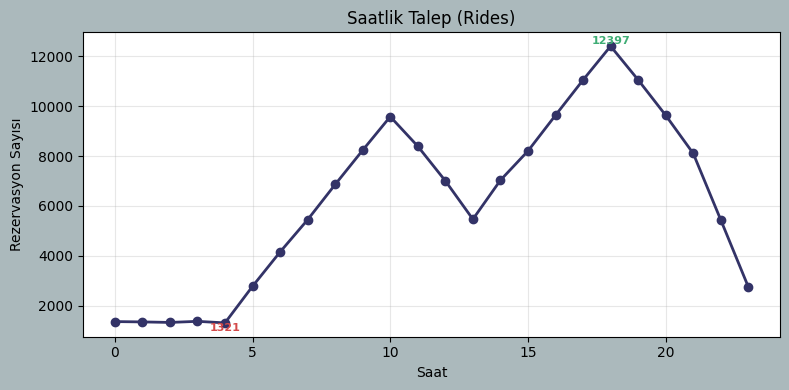

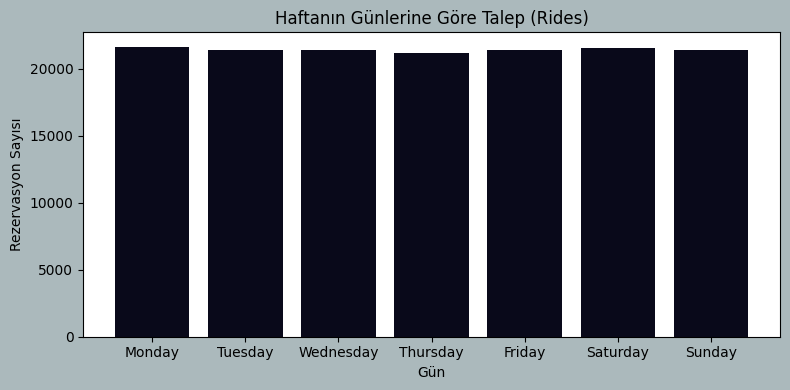

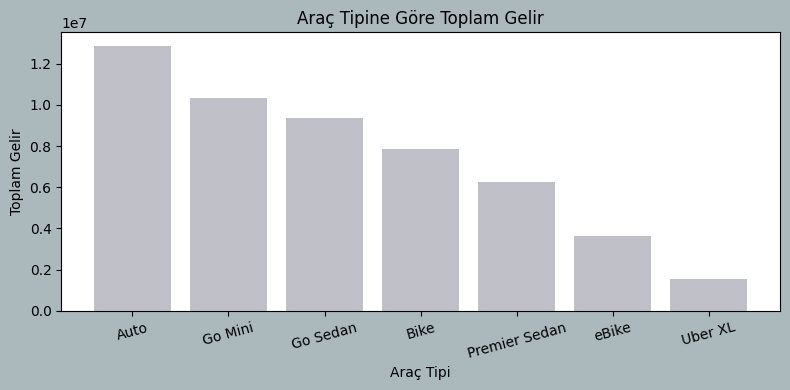

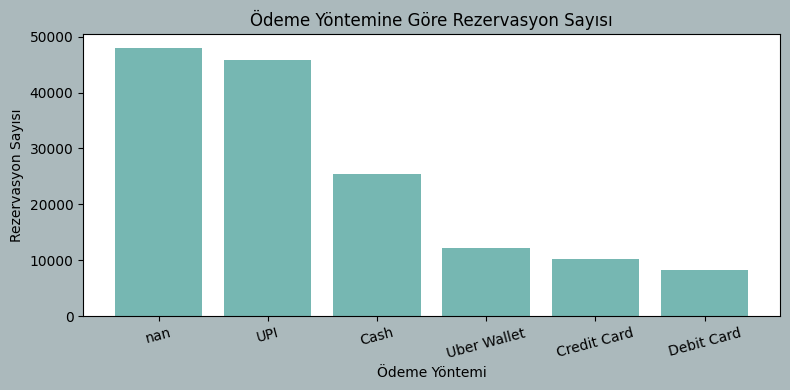

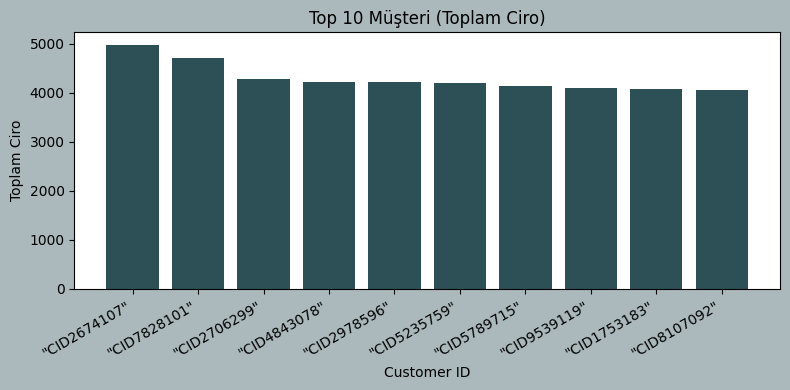

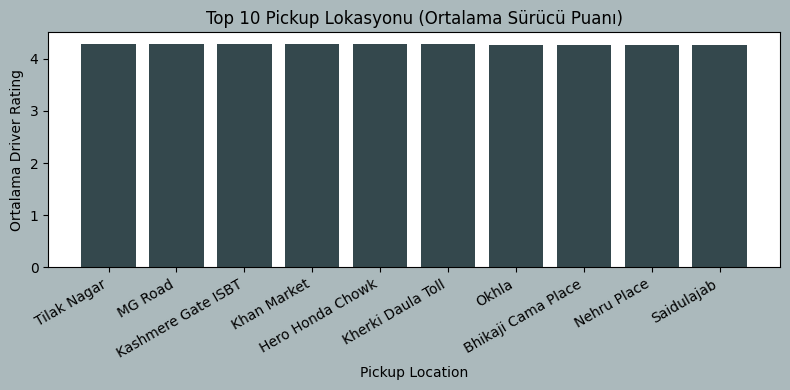

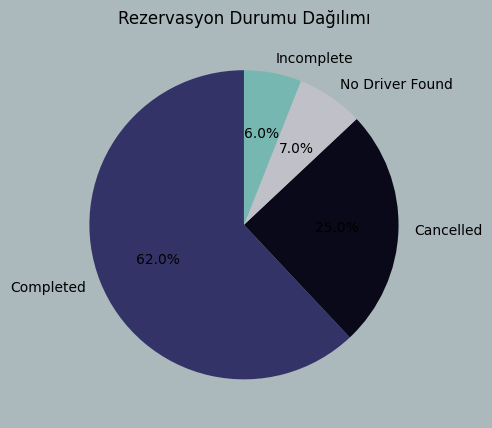

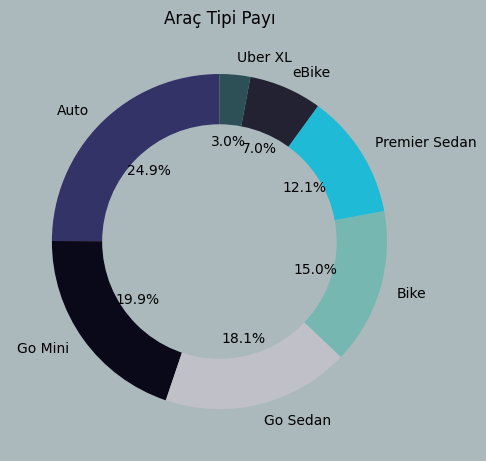

In [113]:
# renk paleti ve backround
palette = ["#333367", "#09091A", "#C0C0C8", "#76B7B2", "#1FBAD6",
           "#222233", "#2D5057", "#34484D", "#A18A7D", "#161629"]
def_facecolor = "#ABB9BC"


#  Günlük talep ve ciro
daily = (uber_dataset.groupby(uber_dataset["start_ts"].dt.date)
           .agg(rides=("booking_id","count"),
                revenue=("booking_value","sum"))
           .reset_index()
           .rename(columns={"start_ts":"date"}))

# Top 10 müşteri (ciroya göre)
top_customers = (uber_dataset.groupby("customer_id", dropna=True)
                   .agg(total_spend=("booking_value","sum"),
                        rides=("booking_id","count"),
                        avg_customer_rating=("customer_rating","mean"))
                   .sort_values(["total_spend","rides"], ascending=[False, False])
                   .head(10)
                   .reset_index())

# Top 10 pickup_location (ortalama sürücü puanı)
top_pickup_driverScore = (uber_dataset.groupby("pickup_location", dropna=True)
                            .agg(avg_driver_rating=("driver_rating","mean"),
                                 rides=("booking_id","count"))
                            .dropna(subset=["avg_driver_rating"])
                            .sort_values(["avg_driver_rating","rides"], ascending=[False, False])
                            .head(10)
                            .reset_index())

# Booking status dağılımı 
status_dist = (uber_dataset["booking_status_norm"]
                 .value_counts(dropna=False)
                 .rename_axis("status")
                 .reset_index(name="count"))

# Araç tipi payı 
vehicle_share = (uber_dataset["vehicle_type"]
                   .value_counts(dropna=False)
                   .rename_axis("vehicle_type")
                   .reset_index(name="rides"))

#---------------------------- Grafikler için

#  Saatlik talep
plt.figure(figsize=(8,4), facecolor=def_facecolor)
plt.plot(hourly["hour"], hourly["rides"], marker="o", linewidth=2, color=palette[0])
plt.title("Saatlik Talep (Rides)",)
plt.xlabel("Saat")
plt.ylabel("Rezervasyon Sayısı")
plt.grid(True, alpha=0.3)
plt.tight_layout()
max_idx = hourly["rides"].idxmax()
min_idx = hourly["rides"].idxmin()

max_x = hourly.loc[max_idx, "hour"]
max_y = hourly.loc[max_idx, "rides"]

min_x = hourly.loc[min_idx, "hour"]
min_y = hourly.loc[min_idx, "rides"]

plt.text(max_x, max_y, f"{int(max_y)}", ha="center", va="bottom", fontsize=8, fontweight="bold", color="#3FAD75")
plt.text(min_x, min_y, f"{int(min_y)}", ha="center", va="top", fontsize=8, fontweight="bold", color="#D34A4A")

plt.tight_layout()



#  Haftanın günlerine göre talep 
plt.figure(figsize=(8,4), facecolor=def_facecolor)
plt.bar(weekday["weekday"], weekday["rides"], color=palette[1])
plt.title("Haftanın Günlerine Göre Talep (Rides)")
plt.xlabel("Gün")
plt.ylabel("Rezervasyon Sayısı")
plt.xticks(rotation=0)
plt.tight_layout()


# Araç tiplerine göre toplam gelir 
plt.figure(figsize=(8,4), facecolor=def_facecolor)
plt.bar(by_vehicle["vehicle_type"].astype(str), by_vehicle["total_revenue"], color=palette[2])
plt.title("Araç Tipine Göre Toplam Gelir")
plt.xlabel("Araç Tipi")
plt.ylabel("Toplam Gelir")
plt.xticks(rotation=15)
plt.tight_layout()


# Ödeme yöntemine göre rezervasyon sayısı
plt.figure(figsize=(8,4), facecolor=def_facecolor)
plt.bar(by_payment["payment_method"].astype(str), by_payment["rides"], color=palette[3])
plt.title("Ödeme Yöntemine Göre Rezervasyon Sayısı")
plt.xlabel("Ödeme Yöntemi")
plt.ylabel("Rezervasyon Sayısı")
plt.xticks(rotation=15)
plt.tight_layout()




#Top 10 müşteri (ciroya göre)
plt.figure(figsize=(8,4), facecolor=def_facecolor)
plt.bar(top_customers["customer_id"].astype(str), top_customers["total_spend"], color=palette[6])
plt.title("Top 10 Müşteri (Toplam Ciro)")
plt.xlabel("Customer ID")
plt.ylabel("Toplam Ciro")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()


#Top 10 pickup_location (avg driver rating)
plt.figure(figsize=(8,4), facecolor=def_facecolor)
plt.bar(top_pickup_driverScore["pickup_location"].astype(str),
        top_pickup_driverScore["avg_driver_rating"], color=palette[7])
plt.title("Top 10 Pickup Lokasyonu (Ortalama Sürücü Puanı)")
plt.xlabel("Pickup Location")
plt.ylabel("Ortalama Driver Rating")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()


# Booking Status Dağılımı
plt.figure(figsize=(5,5), facecolor=def_facecolor)
plt.pie(status_dist["count"],
        labels=status_dist["status"].astype(str),
        autopct="%1.1f%%",
        startangle=90,
        colors=palette[:len(status_dist)])
plt.title("Rezervasyon Durumu Dağılımı")
plt.tight_layout()


#Araç Tipi Payı
plt.figure(figsize=(5,5), facecolor=def_facecolor)
wedges, texts, autotexts = plt.pie(vehicle_share["rides"],
                                   labels=vehicle_share["vehicle_type"].astype(str),
                                   autopct="%1.1f%%",
                                   startangle=90,
                                   colors=palette[:len(vehicle_share)])

centre_circle = plt.Circle((0,0), 0.70, fc=def_facecolor)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Araç Tipi Payı")
plt.tight_layout()
plt.show()


Özet İçgörüler

In [114]:

def insights():
    notes = []
    
    if not hourly.empty:
        h_peak = hourly.loc[hourly["rides"].idxmax(), "hour"]
        notes.append(f"En yoğun saat: {int(h_peak)}:00 saatleri.")
    
    if not by_vehicle.empty:
        top_v = by_vehicle.iloc[0]
        notes.append(f"En yüksek cirolu araç tipi: {str(top_v['vehicle_type'])} (Toplam Gelir: {top_v['total_revenue']:.2f}).")
    
    notes.append(f"İptal oranı (genel): %{kpi['İptal (%)']}. "
                 f"Müşteri kaynaklı iptal: %{kpi['Müşteri Kaynaklı İptal (%)']}, "
                 f"Sürücü kaynaklı iptal: %{kpi['Sürücü Kaynaklı İptal (%)']}.")
    
    notes.append(f"Ortalama VTAT: {uber_dataset['avg_vtat_min'].mean():.2f} dk, Ortalama CTAT: {uber_dataset['avg_ctat_min'].mean():.2f} dk.")
    return "\n- " + "\n- ".join(notes)

print("\n--- İçgörüler ---")
print(insights())


--- İçgörüler ---

- En yoğun saat: 18:00 saatleri.
- En yüksek cirolu araç tipi: Auto (Toplam Gelir: 12878422.00).
- İptal oranı (genel): %25.0. Müşteri kaynaklı iptal: %7.0, Sürücü kaynaklı iptal: %18.0.
- Ortalama VTAT: 8.46 dk, Ortalama CTAT: 29.15 dk.
